# **PotatoLife - Training**

*Mounting drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Getting the dataset from mounted drive*

In [ ]:
!unzip /content/drive/MyDrive/PlantVillage.zip

Archive:  /content/drive/MyDrive/PlantVillage.zip
   creating: PlantVillage/Potato___Early_blight/
  inflating: PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: PlantVillage/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: PlantVillage/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: PlantVillage/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: PlantVillage/Potato___Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG  
  inflating: PlantVillage/Pot

*Importing Libraries*

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

## Data Preprocessing

### ***Data Batch Loading***

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


*Data description*

In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# number of batches
len(dataset)

68

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[2 0 1 1 1 0 1 1 1 0 1 0 0 0 1 2 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1]


In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[193. 184. 187.]
  [184. 175. 178.]
  [179. 170. 173.]
  ...
  [157. 147. 156.]
  [156. 146. 155.]
  [155. 145. 154.]]

 [[184. 175. 178.]
  [178. 169. 172.]
  [176. 167. 170.]
  ...
  [165. 155. 164.]
  [161. 151. 160.]
  [156. 146. 155.]]

 [[180. 171. 174.]
  [176. 167. 170.]
  [177. 168. 171.]
  ...
  [165. 155. 164.]
  [157. 147. 156.]
  [150. 140. 149.]]

 ...

 [[132. 113. 119.]
  [126. 107. 113.]
  [119. 100. 106.]
  ...
  [103.  83.  92.]
  [116.  96. 105.]
  [124. 104. 113.]]

 [[138. 119. 125.]
  [131. 112. 118.]
  [128. 109. 115.]
  ...
  [119.  99. 108.]
  [119.  99. 108.]
  [117.  97. 106.]]

 [[139. 120. 126.]
  [133. 114. 120.]
  [133. 114. 120.]
  ...
  [117.  97. 106.]
  [133. 113. 122.]
  [126. 106. 115.]]]


In [ ]:
 for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


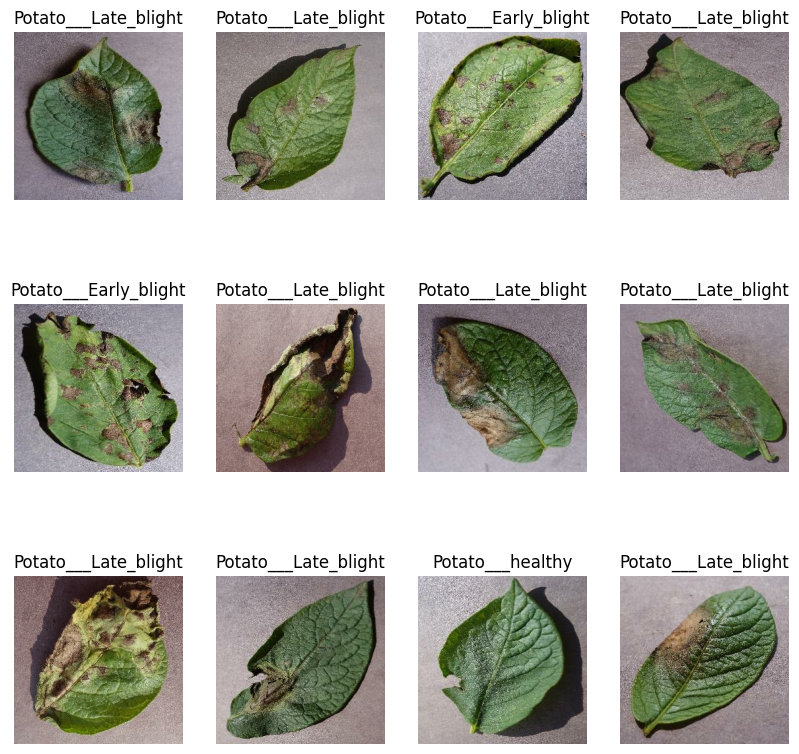

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

### ***Data Partitioning***

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### ***Data resizing and rescaling***

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

### ***Data augmentation***

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

## Model Building

***Model Architecture***

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2, input_shape=(2,)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

***Compilation***

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

***Training of model***

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 23s 150ms/step - loss: 0.9108 - accuracy: 0.4578 - val_loss: 0.8004 - val_accuracy: 0.5781
Epoch 2/50
54/54 [==============================] - 6s 102ms/step - loss: 0.7226 - accuracy: 0.6493 - val_loss: 0.5886 - val_accuracy: 0.7448
Epoch 3/50
54/54 [==============================] - 5s 101ms/step - loss: 0.5028 - accuracy: 0.7986 - val_loss: 0.3267 - val_accuracy: 0.8594
Epoch 4/50
54/54 [==============================] - 5s 99ms/step - loss: 0.3857 - accuracy: 0.8432 - val_loss: 0.4887 - val_accuracy: 0.8177
Epoch 5/50
54/54 [==============================] - 5s 100ms/step - loss: 0.2816 - accuracy: 0.8935 - val_loss: 0.2524 - val_accuracy: 0.9115
Epoch 6/50
54/54 [==============================] - 5s 100ms/step - loss: 0.2475 - accuracy: 0.9109 - val_loss: 0.2379 - val_accuracy: 0.9010
Epoch 7/50
54/54 [==============================] - 5s 98ms/step - loss: 0.2762 - accuracy: 0.8889 - val_loss: 0.1509 - val_accuracy: 0.9427
Epoch 8

In [ ]:
scores = model.evaluate(test_ds)
print('Test accuracy : ',scores[1]*100)

8/8 [==============================] - 2s 27ms/step - loss: 0.0621 - accuracy: 0.9883
Test accuracy :  98.828125


In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9107632637023926,
 0.7226114869117737,
 0.5028294324874878,
 0.3857366740703583,
 0.28160029649734497]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

*Model Analysis*

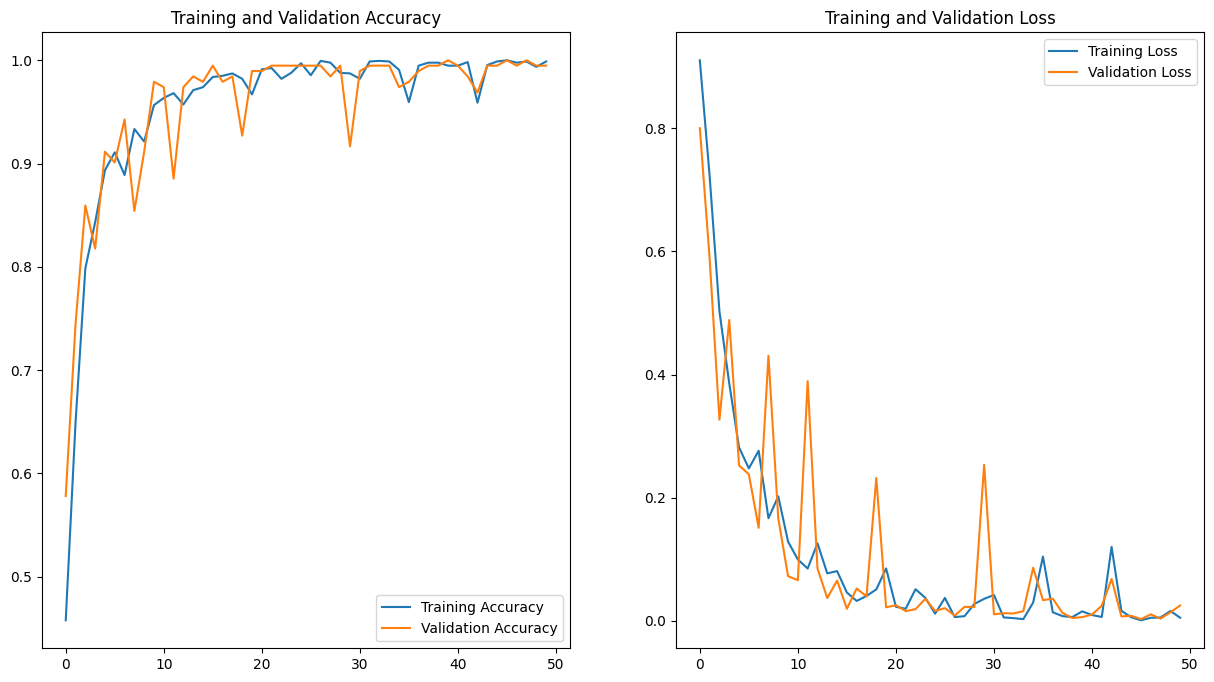

In [ ]:
EPOCHS=50
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

*Testing on sample*

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 160ms/step
predicted label: Potato___Late_blight


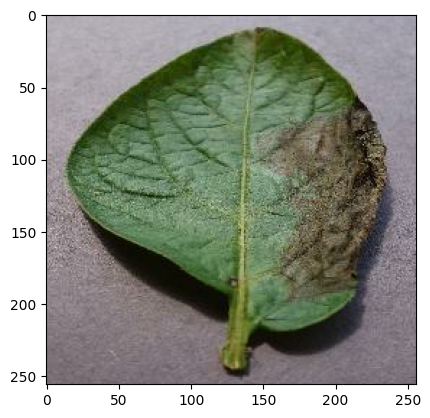

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 30ms/step


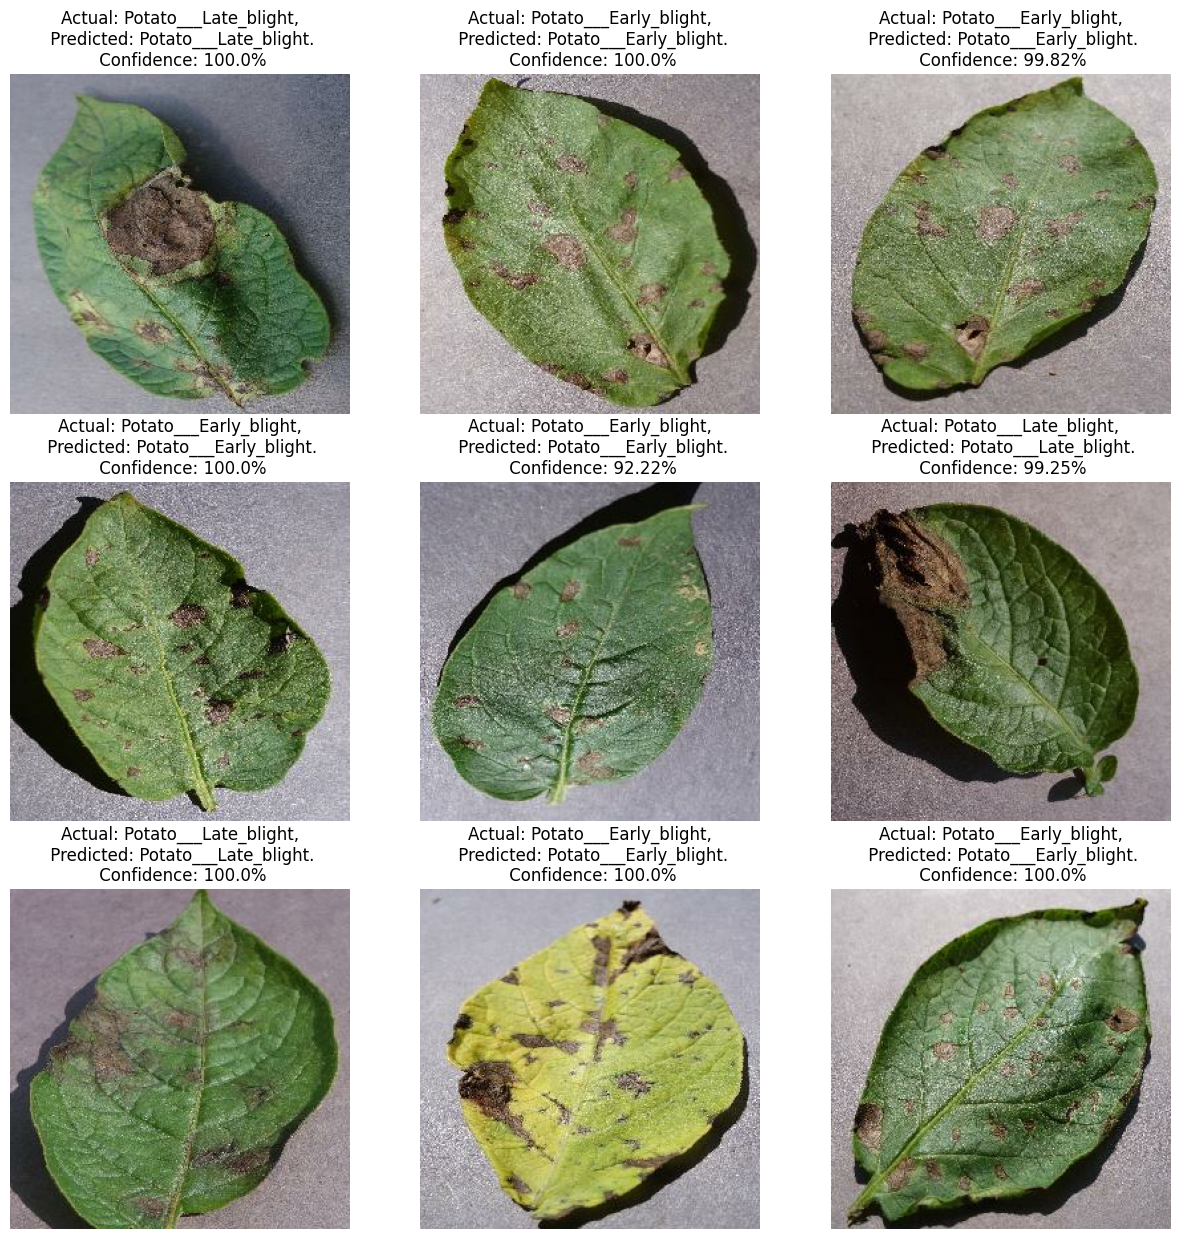

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

***Saving the model***

In [ ]:
!mkdir cmodels

In [ ]:
import os
model_version=5
model.save(f"/content/cmodels/{model_version}")

In [ ]:
 model.save(f"/content/cmodels/{model_version}/potatoes.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!zip -r pdc_models.zip /content/cmodels

  adding: content/cmodels/ (stored 0%)
  adding: content/cmodels/3/ (stored 0%)
  adding: content/cmodels/3/assets/ (stored 0%)
  adding: content/cmodels/3/keras_metadata.pb (deflated 94%)
  adding: content/cmodels/3/variables/ (stored 0%)
  adding: content/cmodels/3/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: content/cmodels/3/variables/variables.index (deflated 68%)
  adding: content/cmodels/3/fingerprint.pb (stored 0%)
  adding: content/cmodels/3/saved_model.pb (deflated 89%)
  adding: content/cmodels/5/ (stored 0%)
  adding: content/cmodels/5/potatoes.h5 (deflated 13%)
  adding: content/cmodels/5/assets/ (stored 0%)
  adding: content/cmodels/5/keras_metadata.pb (deflated 94%)
  adding: content/cmodels/5/variables/ (stored 0%)
  adding: content/cmodels/5/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: content/cmodels/5/variables/variables.index (deflated 68%)
  adding: content/cmodels/5/fingerprint.pb (stored 0%)
  adding: content/cmodels/5/save